In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import os
# print(os.listdir("../ML Project 562"))
df = pd.read_csv("heart.csv")

accuracies = {}

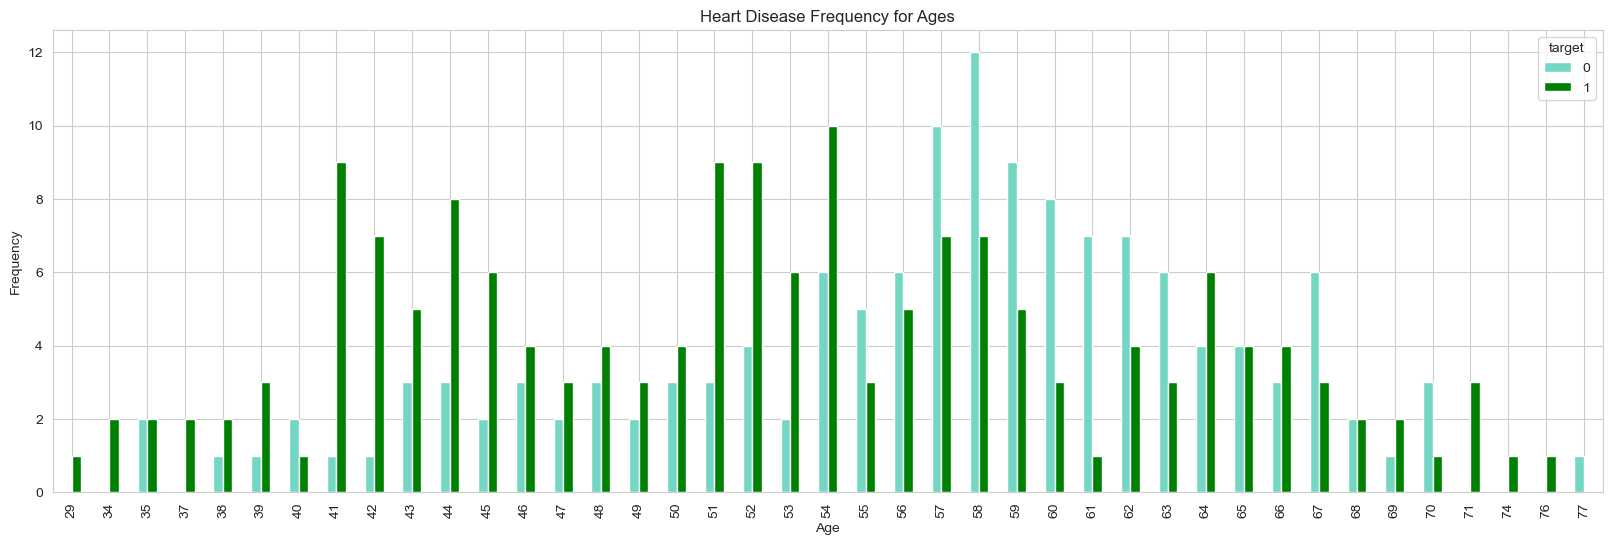

In [119]:
#Age vs Heart Disease Frequency Graph 
colors = ["#74D7C3", "green"]
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [129]:
#Split the data in to train and tests
y = df.target.values
xData = df.drop(['target'], axis = 1)

# Normalize
x = (xData - np.min(xData)) / (np.max(xData) - np.min(xData)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
print(x_train)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
74   0.291667  0.0  0.666667  0.264151  0.198630  0.0      0.5  0.717557   
153  0.770833  0.0  0.666667  0.490566  0.347032  0.0      0.0  0.618321   
64   0.604167  1.0  0.666667  0.433962  0.194064  1.0      0.0  0.717557   
296  0.708333  0.0  0.000000  0.283019  0.162100  0.0      0.5  0.496183   
287  0.583333  1.0  0.333333  0.566038  0.242009  0.0      0.0  0.709924   
..        ...  ...       ...       ...       ...  ...      ...       ...   
251  0.291667  1.0  0.000000  0.358491  0.276256  1.0      0.0  0.549618   
192  0.520833  1.0  0.000000  0.245283  0.141553  0.0      0.5  0.320611   
117  0.562500  1.0  1.000000  0.245283  0.152968  0.0      0.0  0.694656   
47   0.375000  1.0  0.666667  0.415094  0.299087  0.0      0.0  0.648855   
172  0.604167  1.0  0.333333  0.245283  0.360731  0.0      0.0  0.679389   

     exang   oldpeak  slope    ca      thal  
74     0.0  0.032258    0.5  0.00  0.6666

C:\Users\Sarika S\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Sarika S\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


C:\Users\Sarika S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sarika S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

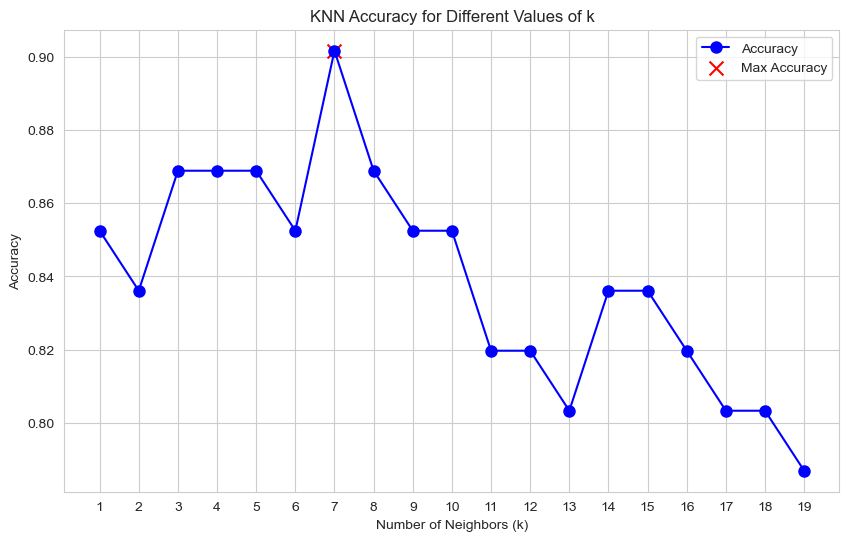

Maximum KNN Score is 90.16% at k = 7


In [107]:
from sklearn.neighbors import KNeighborsClassifier

#K Nearest Neighbors Approach 
# Try to find the best k value
k_range = range(1, 20)
scores = []

# Train KNN models and store scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train.T, y_train.T)
    scores.append(knn.score(x_test.T, y_test.T))

# Plotting the graph with enhanced aesthetics
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b', markersize=8, label='Accuracy')

# Highlight the maximum score
max_score_index = np.argmax(scores)
plt.scatter(k_range[max_score_index], scores[max_score_index], color='red', marker='x', s=100, label='Max Accuracy')

# Title and labels
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.show()

# Print Maximum Score
max_acc = max(scores) * 100
accuracies['KNN'] = max_acc
print("Maximum KNN Score is {:.2f}% at k = {}".format(max_acc, k_range[max_score_index]))




In [108]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(562)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train.T, y_train.T)

acc = decision_tree.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.05%


In [109]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train.T, y_train.T)

acc = naive_bayes.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 85.25%


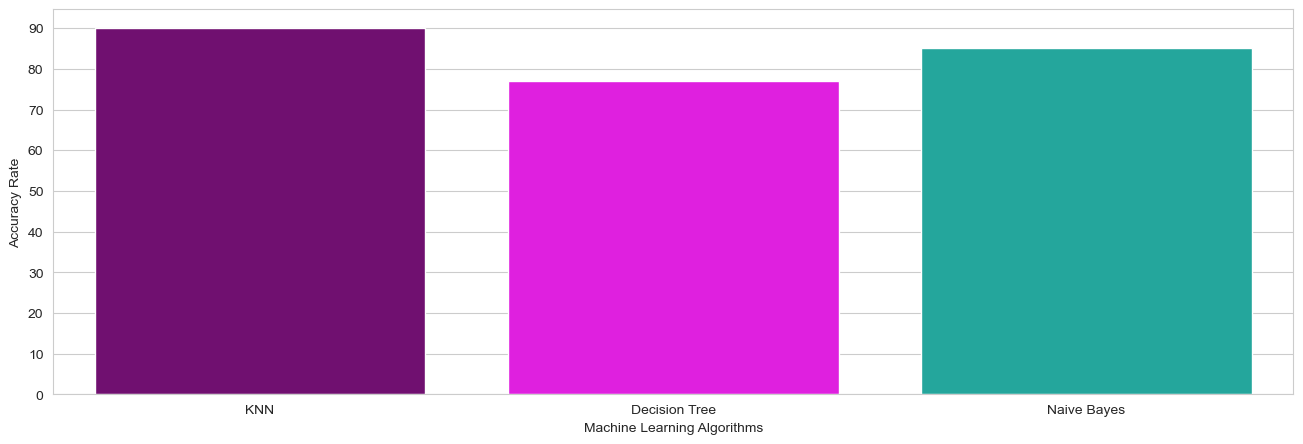

In [111]:
colors = ["purple", "magenta", "#0FBBAE"]

plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy Rate")
plt.xlabel("Machine Learning Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()